In [1]:
from indigo import Indigo
import pandas as pd
from ord_data_load import ORD_PATH, draw_reaction
from IPython.display import SVG

%load_ext autoreload
%autoreload 2

In [2]:
indigo = Indigo()

In [3]:
indigo.version()

'1.9.0.0-gca3f2ab4a-x86_64-win-msvc-1934'

In [4]:
%%time
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')
pd_mask = pd.read_pickle(f'{ORD_PATH}/pd_mask.pkl')
pd_df = all_reactions[pd_mask]

CPU times: total: 18.2 s
Wall time: 18.2 s


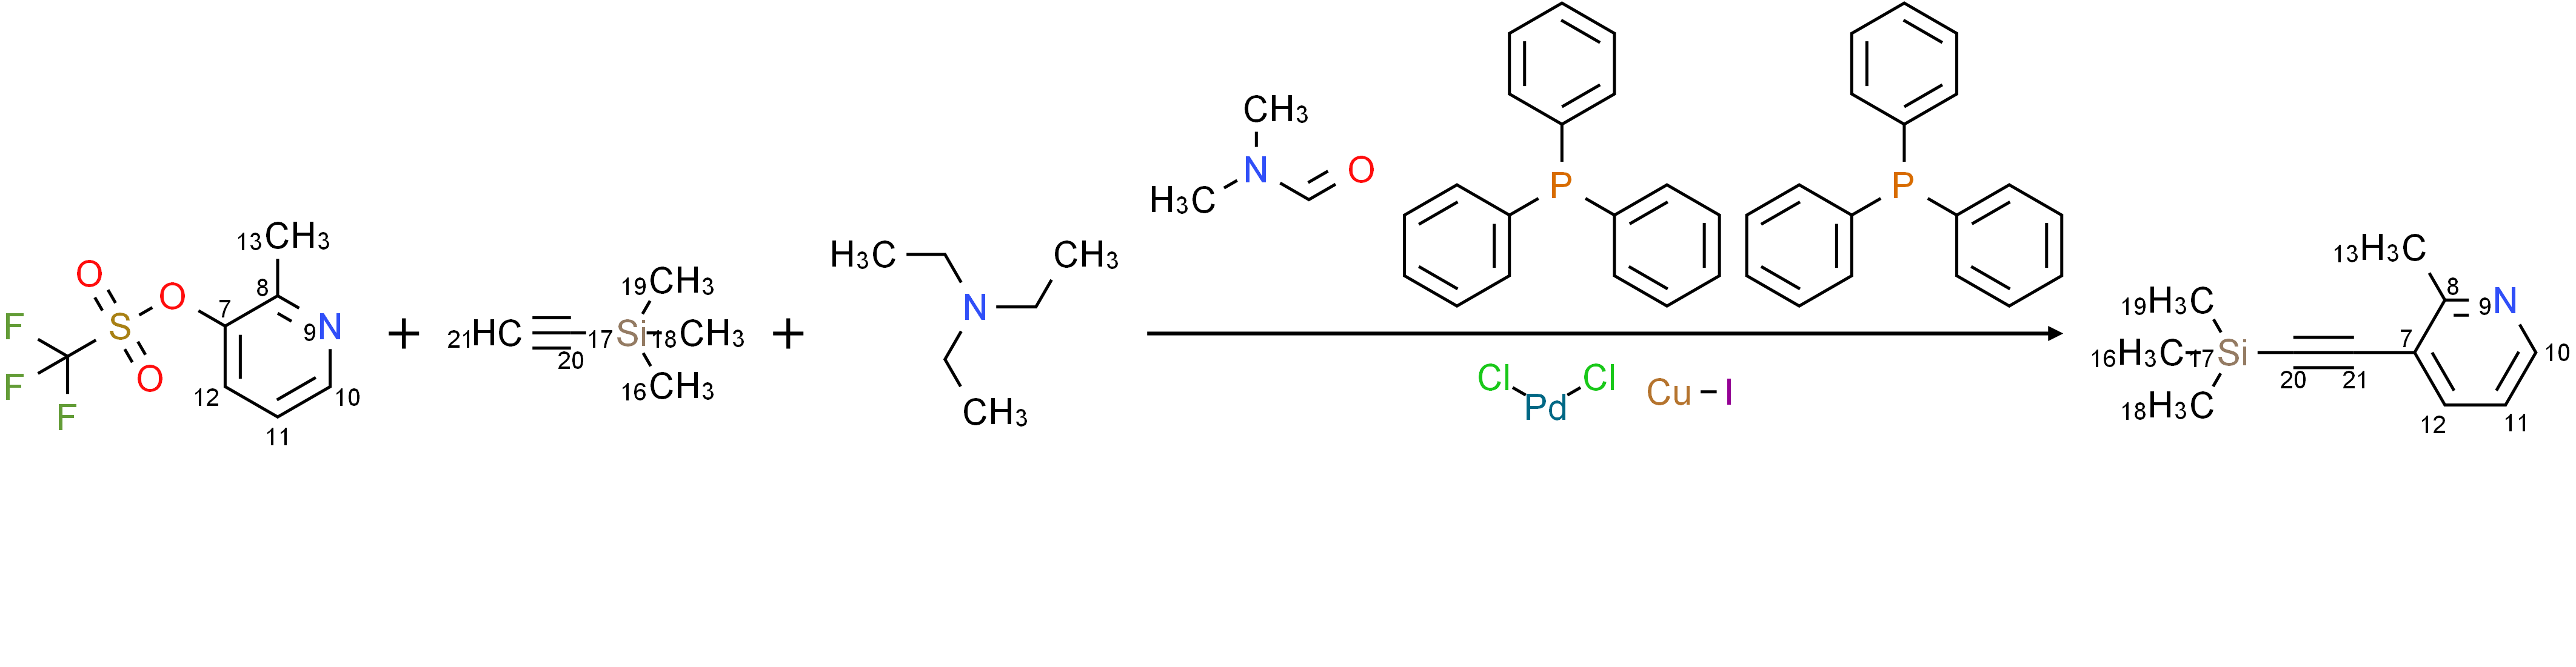

First, 2-methylpyridin-3-yl trifluoromethanesulfonate (34.3 g, 142 mmol), trimethylsilylacetylene (30 ml, 212 mmol), bis(triphenylphosphine)palladium (II) chloride (10.0 g, 14.2 mmol), and copper (I) iodide (2.75 g, 14.4 mmol) were dissolved in N,N-dimethyl formamide (150 ml). Thereafter, triethylamine (43 ml, 309 mmol) was added in a nitrogen atmosphere at room temperature to the mixture. The mixture was then stirred for 3 hours (exothermic reaction took place). The reaction mixture was separated by ethyl acetate and a saturated aqueous ammonium chloride solution and insoluble substance was removed by filtration. The organic layer of the filtrate was washed twice with a saturated aqueous ammonium chloride solution, dried over anhydrous magnesium sulfate, filtrated and concentrated to obtain the title compound (22.6 g, yield: 84.1%) as brown oil.
CPU times: total: 250 ms
Wall time: 270 ms


In [5]:
%%time
draw_reaction(pd_df.iloc[3000])
rxn_smile = pd_df.iloc[3000]['reaction_smile']

In [6]:
rxn = indigo.loadReaction(rxn_smile)
rxn

In [7]:
from indigo.renderer import IndigoRenderer

renderer = IndigoRenderer(indigo)

indigo.setOption("render-output-format", "svg")
# indigo.setOption("render-superatom-mode", "collapse")
indigo.setOption("render-coloring", True)
# indigo.setOption("render-base-color", "1, 1, 1")
indigo.setOption("render-relative-thickness", 1.5)

CPU times: total: 31.2 ms
Wall time: 41 ms


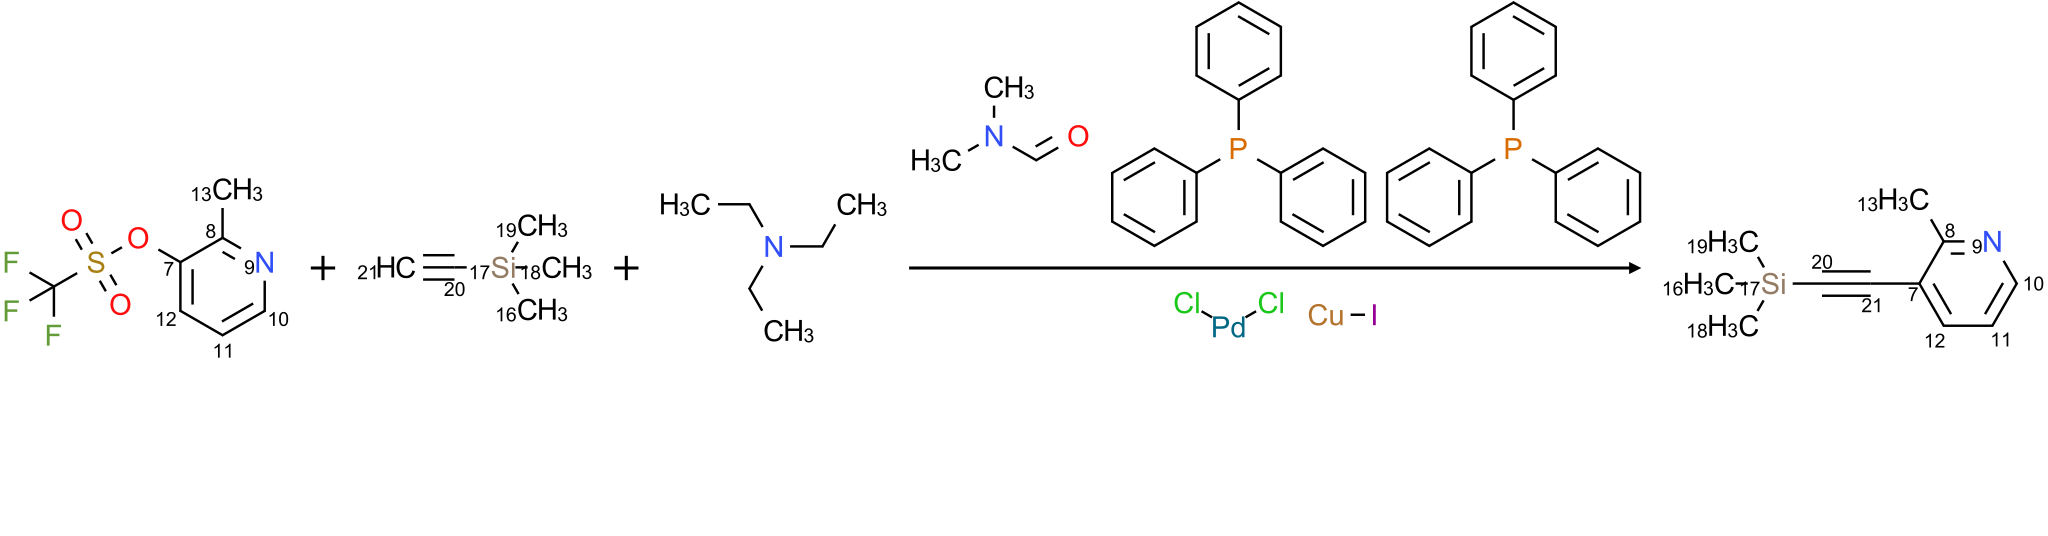

In [8]:
%%time
SVG(renderer.renderToBuffer(rxn))

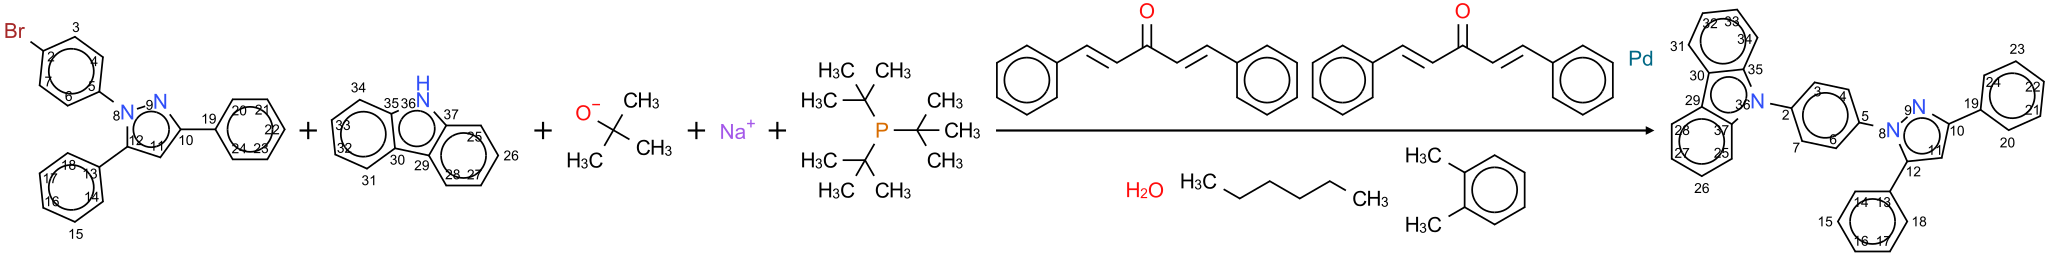

In [9]:
import numpy as np
# idx = np.random.randint(0, len(pd_df))
idx = 59585
rxn = indigo.loadReaction(pd_df.iloc[idx]['reaction_smile'])
rxn.aromatize()
SVG(renderer.renderToBuffer(rxn))

In [13]:
# BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[N,n;X3:2]>>[c:1]-[N,n;X3:2]"
# BUCHWALD_RXN_SMARTS = "[#5][#35].[#6]>>[#5][#6]"
# query = indigo.loadReactionSmarts(BUCHWALD_RXN_SMARTS)

21815


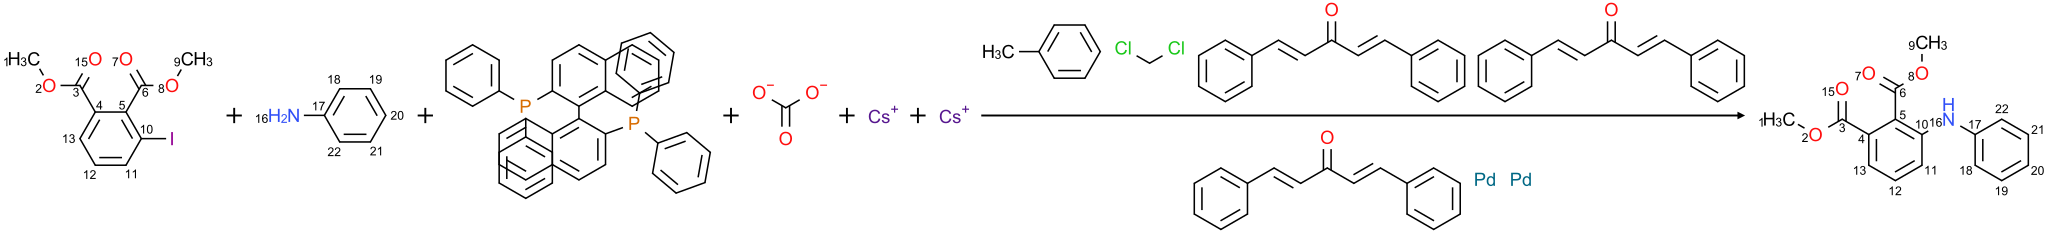

In [10]:
query = indigo.loadReactionSmarts("[c:1]-[Br,Cl,I].[N,n:2]>>[c:1]-[N,n:2]")
query.optimize()

idx = 21815
# idx = np.random.randint(0, len(pd_df))
rxn = indigo.loadReaction(pd_df.iloc[idx]['reaction_smile'])

# match = indigo.substructureMatcher(rxn, "DAYLIGHT-AAM").match(query)
match = indigo.substructureMatcher(rxn).match(query)
if match:
    print(idx)
    display(SVG(renderer.renderToBuffer(rxn)))

    #     for bond in mol.iterateBonds():
    #         if match.mapBond(bond):
    #             print(f"atom {bond.index()} matched")

In [11]:
def rxn_match(rxn_smiles, rxn_query) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(rxn_query) else False

In [19]:
%%time
mask = pd_df['reaction_smile'].apply(rxn_match, rxn_query=query)
buchwald_df = pd_df[mask].copy()
len(buchwald_df)

CPU times: total: 2min 28s
Wall time: 2min 28s


10519

In [20]:
buchwald_df.reset_index(drop=True, inplace=True)

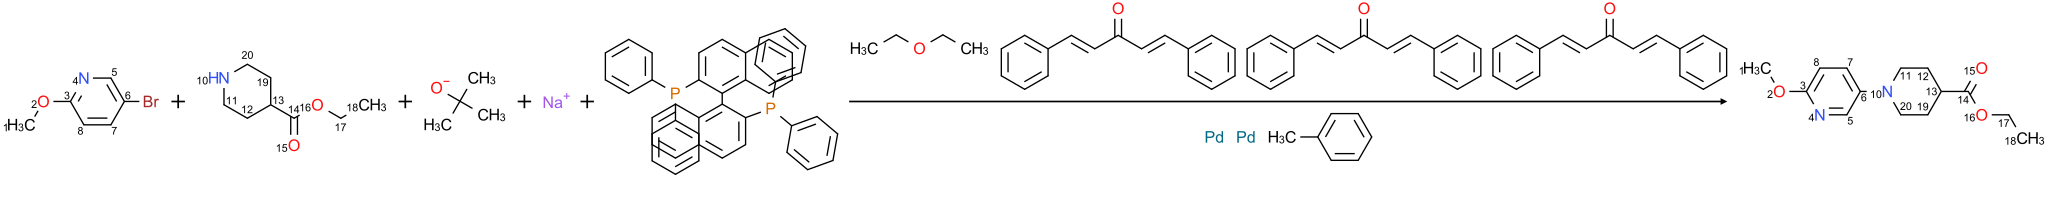

In a round-bottom flask, 20 ml of anhydrous toluene is added and degassed several times from vacuum/N2. 2-methoxy-5-bromopyridine (752 mg, 4.0 mmol), ethyl isonipecotate (740 mg, 4.8 mmol), sodium t-butoxide (537 mg, 5.6 mmol), Pd2(DBA)3 (73 mg, 2 mol %) and of BINAP (100 mg, 0.16 mmol) are added and heated to 70° C. under N2 for 16 hrs. The reaction is cooled to r.t. and taken up in 100 ml of ethyl ether and washed with brine (2×50 ml). The ether is dried over MgSO4, filtered and reduced to an oil under vacuum. The compound is purified by flash chromatography on silica gel using 20% ethyl acetate/hexane as the eluent to provide 6′-methoxy-3,4,5,6-tetrahydro-2H-[1,3′]bipyridinyl-4-carboxylic acid ethyl ester. 1H NMR (300 MHz, CDCl3) δ 7.78 (d, 1H), 7.28 (dd, 1H), 6.66 (d, 1H), 4.15 (q, 2H), 3.87 (s, 3H), 3.42 (dt, 2H), 2.71 (dt, 2H), 2.39 (m, 1H), 2.03 (m, 2H), 1.90 (m, 2H), 1.26 (t, 3H); MS (EI) 264 (M)+.
CPU times: total: 62.5 ms
Wall time: 55 ms


In [21]:
%%time
idx = np.random.randint(0, len(buchwald_df))
rxn = indigo.loadReaction(buchwald_df.iloc[idx]['reaction_smile'])
display(SVG(renderer.renderToBuffer(rxn)))
print(buchwald_df.loc[idx, 'notes'])

In [12]:
%%time
# indigo reaction search
SUZUKI_PATTERN = "[B;X3,4]-[C,c:1].[C,c:2]-[Cl,Br,I,O]>>[C,c:1]-[C,c:2]"
query = indigo.loadReactionSmarts(SUZUKI_PATTERN)
query.optimize()
# mask = pd_df['reaction_smile'].apply(rxn_match, rxn_query=query)
# suzuki_df = pd_df[mask].copy()
# suzuki_df.reset_index(drop=True, inplace=True)
# len(suzuki_df)

CPU times: total: 0 ns
Wall time: 1e+03 µs


1

In [13]:
%%time
# rdkit reaction search
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

rxn_pattern = ReactionFromSmarts(SUZUKI_PATTERN)
# mask = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rxn_pattern)
# rdkit_suzuki_df = pd_df[mask].copy()
# rdkit_suzuki_df.reset_index(drop=True, inplace=True)
# len(rdkit_suzuki_df)

CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 19.1 s
Wall time: 19.1 s


In [25]:
# %%time
# all_reactions['indigo_rxn'] = all_reactions['reaction_smile'].apply(lambda x: indigo.loadReaction(x) if x else None)

In [14]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_rdkit = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rxn_pattern,
                 meta=pd.Series(dtype=bool)).compute(scheduler='processes') # rdkit functions are not parralizable using "threads"
suzuki_rdkit.sum()

[########################################] | 100% Completed | 85.73 s


44412

In [15]:
query = indigo.loadReactionSmarts(SUZUKI_PATTERN)

def rxn_match(rxn_smiles) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(query) else False

dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_indigo = dds.apply(rxn_match,
                 # args=[query,),
                 # rxn_query=query,
                 meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo.sum()

[########################################] | 100% Completed | 249.29 s


50876

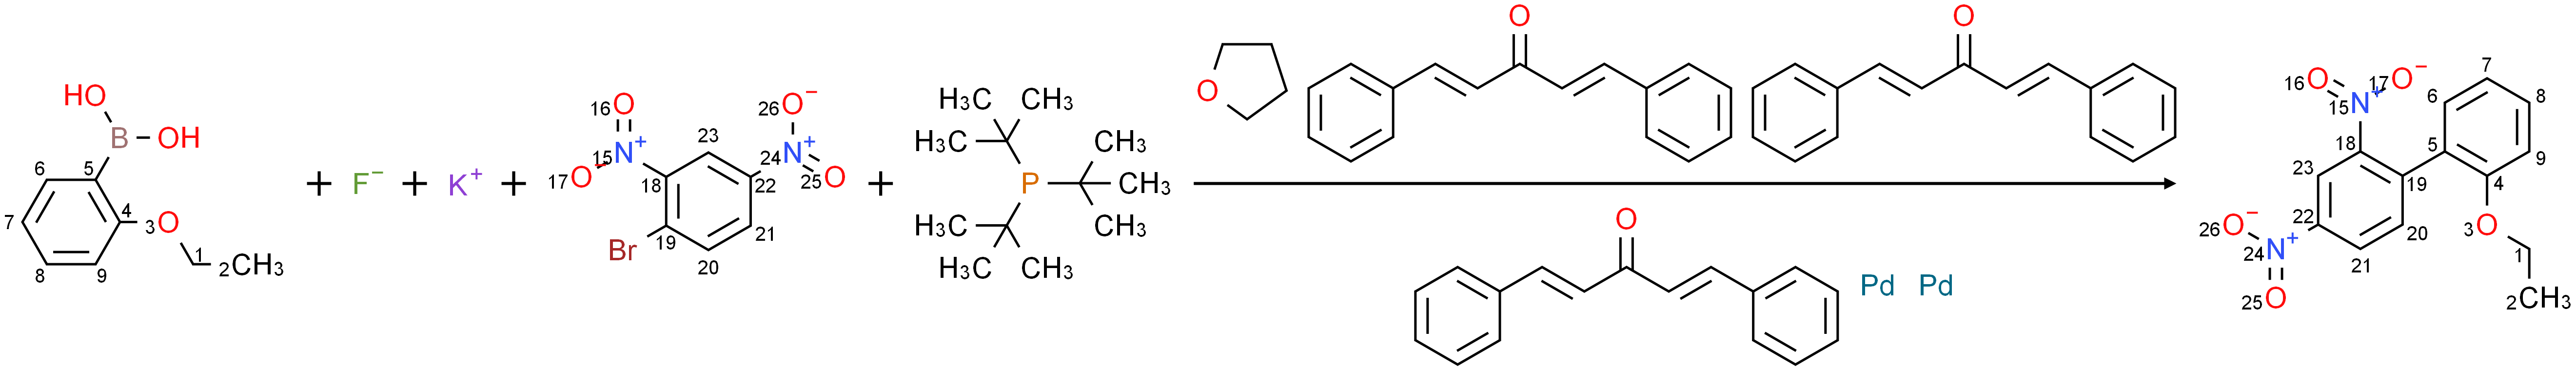

A pressure flask was charged with 2-ethoxyphenylboronic acid (0.66 g, 4.0 mmol), KF (0.77 g, 13 mmol), Pd2(dba)3 (16 mg, 0.02 mmol), and 2,4-dinitro-bromobenzene (0.99 g, 4.0 mmol) in THF (5 mL). The vessel was purged with argon for 1 min followed by the addition of tri-tert-butylphosphine (0.15 mL, 0.48 mmol, 10% solution in hexanes). The reaction vessel was purged with argon for additional 1 min., sealed and heated at 80° C. overnight. After cooling to room temperature, the solution was filtered through a plug of Celite. The filter cake was rinsed with CH2Cl2 (10 mL), and the combined organic extracts were concentrated under reduced pressure to provide the crude product 2′-ethoxy-2,4-dinitro-biphenyl (0.95 g, 82%). No further purification was performed. 1H NMR (300 MHz, CDCl3) δ 8.75 (s, 1H), 8.43 (d, J=8.7 Hz, 1H), 7.60 (d, J=8.4 Hz, 1H), 7.40 (t, J=7.8 Hz, 1H), 7.31 (d, J=7.5 Hz, 1H), 7.08 (t, J=7.5 Hz, 1H), 6.88 (d, J=8.4 Hz, 1H), 3.44 (q, J=6.6 Hz, 2H), 1.24 (t, J=6.6 Hz, 3H); HP

In [29]:
draw_reaction(all_reactions[suzuki_indigo & ~suzuki_rdkit].sample())

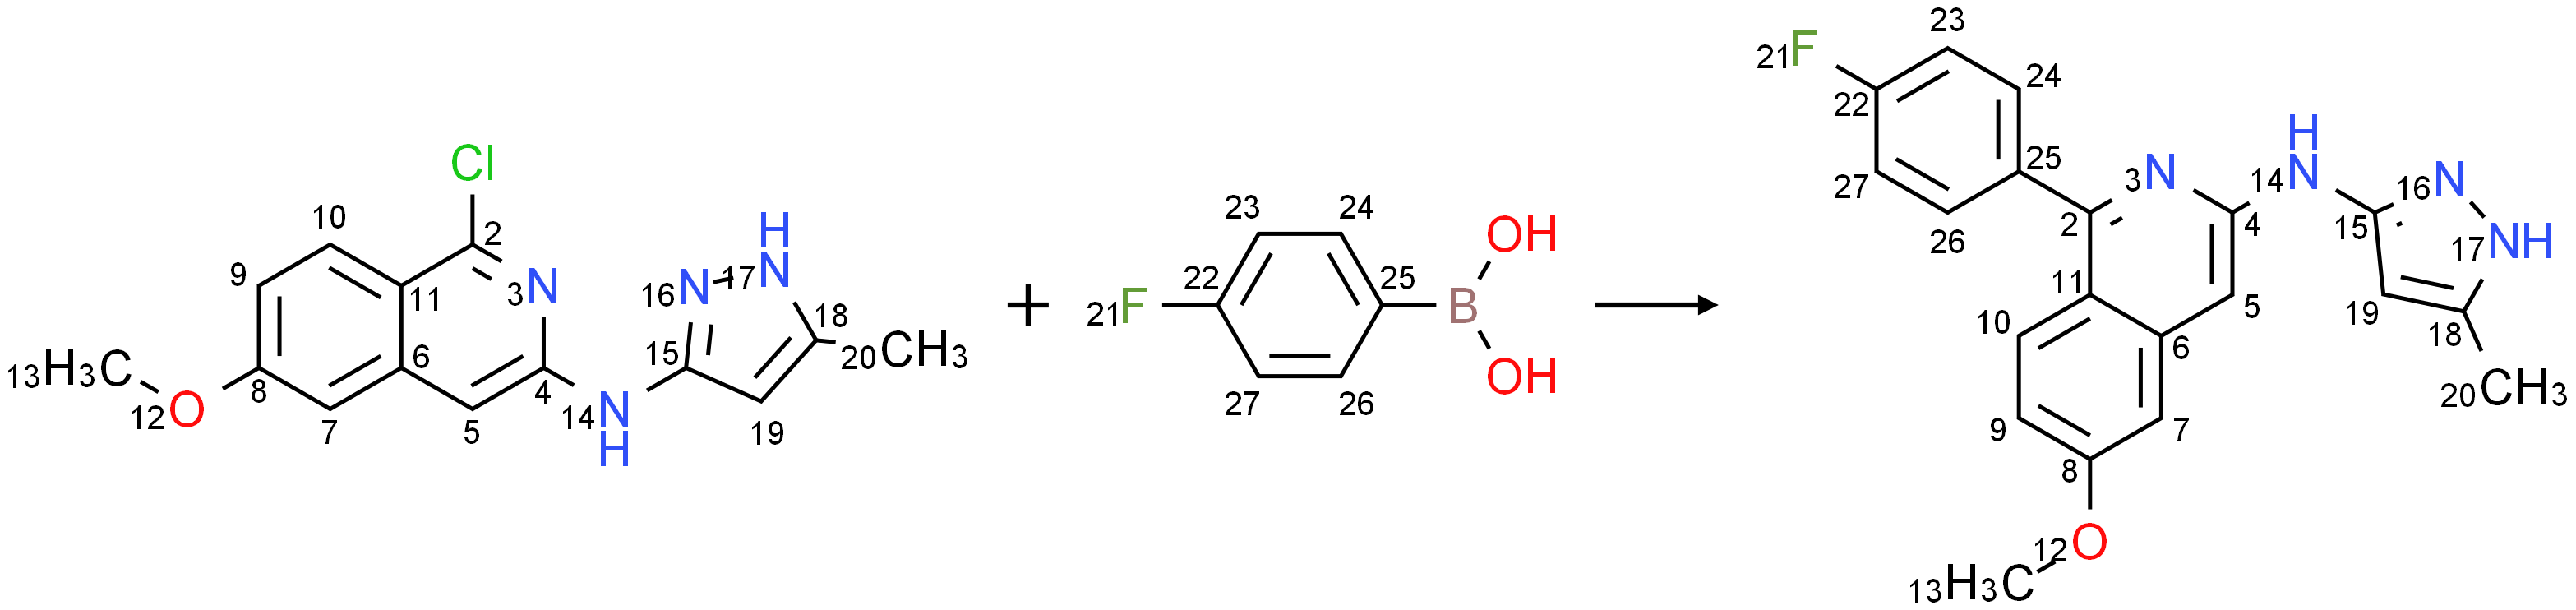

Similar procedure as described in example 131 was used, starting from (1-chloro-6-methoxy-isoquinolin-3-yl)-(5-methyl-1H-pyrazol-3-yl)-amine and 4-fluoro-phenylboronic acid to give [1-(4-fluoro-phenyl)-6-methoxy-isoquinolin-3-yl]-(5-methyl-1H-pyrazol-3-yl)-amine.). LC-MS m/e 349(MH+).


In [46]:
draw_reaction(all_reactions[suzuki_indigo & ~pd_mask].sample())